In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## Reading data
dfRequisition = pd.read_csv('requisition_master.csv', header=0, index_col=0)
dfRequisition.head(5)

,Requisition,Date Created,Company,Job Title,Job Category,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,...,Ready to Submit,Client Rejected Candidate,Declined from Web Apply,Offer Declined,Offer,Applicants,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates
0,AA155723314,2018-03-14,Auvenir,Product Designer,Product/Project Manager,NaN,NaN,Lost - Filled by Competitor,NaN,NaN,...,0,0,0,0,0,2,0,0,0,5
1,AA177112517,2018-05-17,Auvenir,.NET Developer,Developer,NaN,NaN,Canceled - By Recruiter,NaN,NaN,...,0,0,0,0,0,2,0,0,0,2
2,AA20756542,2018-04-02,1Password,Backend Developer,Developer,62500.0,11250.0,Completed,NaN,NaN,...,0,0,0,0,0,15,1,0,0,17
3,AA276030524,2018-05-24,CaseWare International Inc.,DevOps Developer,Developer,105000.0,18900.0,Completed,2018-06-05,12.0,...,0,0,0,0,0,2,1,1,1,20
4,AA298282119,2018-01-19,Scribd,Software Engineer,Engineer,NaN,NaN,Hold,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [3]:
## Adding a IsFilled column
dfRequisition['IsFilled'] = np.where(dfRequisition['Status'] == 'Completed', 1, 0)

In [4]:
for cols in list(dfRequisition['Job Category'].unique()):
    dfRequisition[cols] = np.where(dfRequisition['Job Category']==cols, 1, 0)

dfRequisition.rename(columns={'Product/Project Manager':'IsProjectManager', 'Developer': 'IsDeveloper', 'Engineer': 'IsEngineer', 
                              'Others':'IsOthers', 'Management': 'IsManagement'}, inplace=True)

dfRequisition.head(5)

,Requisition,Date Created,Company,Job Title,Job Category,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,...,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates,IsFilled,IsProjectManager,IsDeveloper,IsEngineer,IsOthers,IsManagement
0,AA155723314,2018-03-14,Auvenir,Product Designer,Product/Project Manager,NaN,NaN,Lost - Filled by Competitor,NaN,NaN,...,0,0,0,5,0,1,0,0,0,0
1,AA177112517,2018-05-17,Auvenir,.NET Developer,Developer,NaN,NaN,Canceled - By Recruiter,NaN,NaN,...,0,0,0,2,0,0,1,0,0,0
2,AA20756542,2018-04-02,1Password,Backend Developer,Developer,62500.0,11250.0,Completed,NaN,NaN,...,1,0,0,17,1,0,1,0,0,0
3,AA276030524,2018-05-24,CaseWare International Inc.,DevOps Developer,Developer,105000.0,18900.0,Completed,2018-06-05,12.0,...,1,1,1,20,1,0,1,0,0,0
4,AA298282119,2018-01-19,Scribd,Software Engineer,Engineer,NaN,NaN,Hold,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0


In [5]:
dfRequisition.rank()
dfRequisition.corr('kendall')['IsFilled'].sort_values()

IsProjectManager               -0.097405
Offer                          -0.056315
Offer Declined                 -0.056315
Web Apply                      -0.045112
IsOthers                       -0.029505
IsManagement                   -0.029281
Client Rejected Candidate      -0.005498
Candidate Declined              0.017609
IsEngineer                      0.019539
Time to Interview               0.045165
Declined from Web Apply         0.069668
Client Declined                 0.074490
IsDeveloper                     0.089989
Ready to Submit                 0.145583
Applicants                      0.155129
Video Interview                 0.155257
HasVideoInterview               0.161555
Internal In Person Interview    0.168429
Pipelined                       0.206158
Phone Screen                    0.209261
Phone Interview                 0.213891
HasPhoneInterview               0.217495
Total Unique Candidates         0.220404
Submitted                       0.260471
Declined from Pi

In [6]:
## Change how the data looks
dfSortResult = dfRequisition.groupby(by='IsFilled').sum()
dfSortResult = dfSortResult[['HasPhoneInterview', 'HasInPersonInterview', 'HasVideoInterview']].transpose()
dfSortResult

IsFilled,0,1
HasPhoneInterview,34,20
HasInPersonInterview,30,25
HasVideoInterview,5,5


In [7]:
dfRequisition.groupby(by='IsFilled').count()

,Requisition,Date Created,Company,Job Title,Job Category,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,...,Applicants,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates,IsProjectManager,IsDeveloper,IsEngineer,IsOthers,IsManagement
IsFilled,,,,,,,,,,,,,,,,,,,,,
0,85,85,85,85,85,0,0,85,30,30,...,85,85,85,85,85,85,85,85,85,85
1,31,31,31,31,31,31,31,31,28,26,...,31,31,31,31,31,31,31,31,31,31


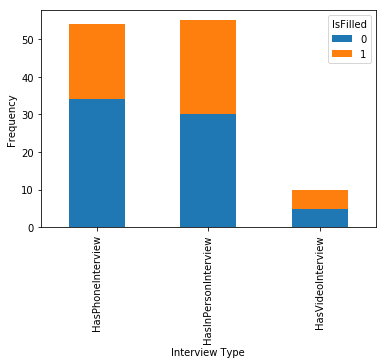

In [8]:
## Stacked bar for requisitons
dfSortResult.plot(kind='bar', stacked=True)
plt.xlabel('Interview Type')
plt.ylabel('Frequency')
plt.show()

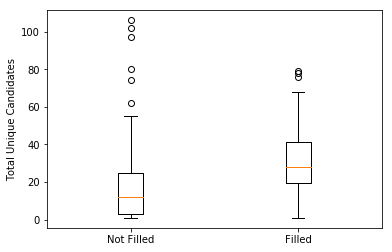

In [9]:
## Boxplot for Total Number of Candidates
data = [dfRequisition[dfRequisition['IsFilled'] == 0]['Total Unique Candidates'], dfRequisition[dfRequisition['IsFilled'] == 1]['Total Unique Candidates']]
plt.boxplot(data, labels=['Not Filled', 'Filled'])
plt.ylabel('Total Unique Candidates')
plt.show()

In [10]:
dfRequisition[dfRequisition['IsFilled'] == 0]['Total Unique Candidates'].describe()

count     85.000000
mean      19.835294
std       23.472297
min        1.000000
25%        3.000000
50%       12.000000
75%       25.000000
max      106.000000
Name: Total Unique Candidates, dtype: float64

In [11]:
dfRequisition[dfRequisition['IsFilled'] == 1]['Total Unique Candidates'].describe()

count    31.000000
mean     31.645161
std      23.133739
min       1.000000
25%      19.500000
50%      28.000000
75%      41.500000
max      79.000000
Name: Total Unique Candidates, dtype: float64

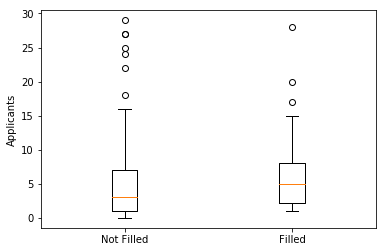

In [12]:
## Boxplot for Total Number of Applicants
data = [dfRequisition[dfRequisition['IsFilled'] == 0]['Applicants'], dfRequisition[(dfRequisition['IsFilled'] == 1) & (dfRequisition['Applicants'] < 50)]['Applicants']]
plt.boxplot(data, labels=['Not Filled', 'Filled'])
plt.ylabel('Applicants')
plt.show()

In [13]:
dfRequisition[dfRequisition['IsFilled'] == 0]['Applicants'].describe()

count    85.000000
mean      5.694118
std       7.000040
min       0.000000
25%       1.000000
50%       3.000000
75%       7.000000
max      29.000000
Name: Applicants, dtype: float64

In [14]:
dfRequisition[dfRequisition['IsFilled'] == 1]['Applicants'].describe()

count    31.000000
mean      8.774194
std      13.608110
min       1.000000
25%       2.500000
50%       5.000000
75%       8.000000
max      74.000000
Name: Applicants, dtype: float64

## Cluster Analysis

In [15]:
dfCluster = dfRequisition[['Requisition', 'Total Unique Candidates', 'Applicants']]
dfCluster.set_index('Requisition', inplace=True)
dfCluster.head(5)

,Total Unique Candidates,Applicants
Requisition,,
AA155723314,5,2
AA177112517,2,2
AA20756542,17,15
AA276030524,20,2
AA298282119,1,1


In [16]:
## Fitting K-Means
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dfCluster[['Total Unique Candidates', 'Applicants']])

## Scaling
scaled_features = scaler.transform(dfCluster[['Total Unique Candidates', 'Applicants']])
scaledDF = pd.DataFrame(scaled_features, columns=dfCluster[['Total Unique Candidates', 'Applicants']].columns)
scaledDF.head(5)

kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(scaledDF)

C:\Users\Weiran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Weiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [17]:
## Creating a cluster column
dfCluster['Cluster'] = kmeans.labels_
dfCluster.head(5)

C:\Users\Weiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Total Unique Candidates,Applicants,Cluster
Requisition,,,
AA155723314,5,2,1
AA177112517,2,2,1
AA20756542,17,15,0
AA276030524,20,2,1
AA298282119,1,1,1


In [18]:
## Looking at the clusters
dfCluster.groupby('Cluster').mean()

,Total Unique Candidates,Applicants
Cluster,,
0,30.090909,8.090909
1,7.523077,2.015385
2,76.000000,74.000000
3,79.400000,10.200000
4,45.000000,26.000000


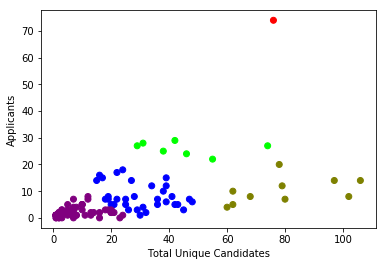

In [19]:
## Plot
plt.scatter(dfCluster['Total Unique Candidates'], dfCluster['Applicants'], c=dfCluster['Cluster'], cmap='brg')
plt.xlabel('Total Unique Candidates')
plt.ylabel('Applicants')
plt.show()

In [20]:
## Selecting the number of clusters: Elbow Method
ks = []
distances = []

for k in range(1, 11):
    ## Create k-means model for our data, using k clusters. It's like we fit 10 models
    kmeans_model = KMeans(n_clusters = k, random_state=1).fit(scaledDF)
    
    ## Sum of distances to centroids
    distance = kmeans_model.inertia_
    
    ## Store in a list
    ks.append(k)
    distances.append(distance)
    
ks, distances

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [232.0,
  116.52256617536318,
  74.5173920817289,
  49.296466694946986,
  31.573132677203645,
  23.6236865824593,
  16.775048647619634,
  14.153958072400735,
  11.357951516810111,
  9.278767445766833])

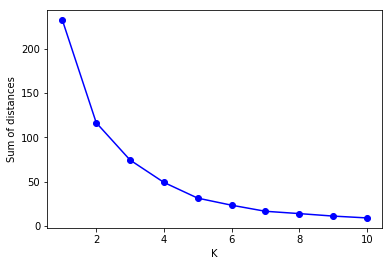

In [21]:
## Plot them
plt.plot(ks, distances, '-bo')
plt.xlabel('K')
plt.ylabel('Sum of distances')
plt.show()
## Distances don't drop much after 3, so 3 is good.

In [22]:
## Merge the datasets
dfRequisition = dfRequisition.merge(dfCluster['Cluster'], how='inner', left_on=['Requisition'], right_on=['Requisition'])
dfRequisition.head(5)

,Requisition,Date Created,Company,Job Title,Job Category,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,...,HasInPersonInterview,HasVideoInterview,Total Unique Candidates,IsFilled,IsProjectManager,IsDeveloper,IsEngineer,IsOthers,IsManagement,Cluster
0,AA155723314,2018-03-14,Auvenir,Product Designer,Product/Project Manager,NaN,NaN,Lost - Filled by Competitor,NaN,NaN,...,0,0,5,0,1,0,0,0,0,1
1,AA177112517,2018-05-17,Auvenir,.NET Developer,Developer,NaN,NaN,Canceled - By Recruiter,NaN,NaN,...,0,0,2,0,0,1,0,0,0,1
2,AA20756542,2018-04-02,1Password,Backend Developer,Developer,62500.0,11250.0,Completed,NaN,NaN,...,0,0,17,1,0,1,0,0,0,0
3,AA276030524,2018-05-24,CaseWare International Inc.,DevOps Developer,Developer,105000.0,18900.0,Completed,2018-06-05,12.0,...,1,1,20,1,0,1,0,0,0,1
4,AA298282119,2018-01-19,Scribd,Software Engineer,Engineer,NaN,NaN,Hold,NaN,NaN,...,0,0,1,0,0,0,1,0,0,1


In [23]:
## Comparing Clusters
dfSortCluster = dfRequisition.groupby(by='Cluster').sum()
dfSortCluster['Not Filled'] = dfRequisition.groupby(by='Cluster').count()['Requisition'] - dfSortCluster['IsFilled']
dfSortCluster

,Salary,SAGE Fee,Time to Interview,Decision Time,Time to Fill,Pipelined,Submitted,Hires,Web Apply,Phone Interview,...,HasInPersonInterview,HasVideoInterview,Total Unique Candidates,IsFilled,IsProjectManager,IsDeveloper,IsEngineer,IsOthers,IsManagement,Not Filled
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1482595.0,271947.1,673.0,467.0,953.0,817,143,16,124,59,...,21,3,993,14,6,9,12,1,5,19
1,1036000.0,177500.0,575.0,134.0,297.0,405,101,11,30,34,...,20,4,489,10,11,24,16,6,8,55
2,70000.0,12600.0,33.0,7.0,40.0,4,6,2,68,4,...,1,0,76,1,0,0,1,0,0,0
3,479500.0,89650.0,236.0,114.0,256.0,736,63,6,39,31,...,8,0,794,5,0,7,3,0,0,5
4,75000.0,750.0,167.0,0.0,31.0,167,48,1,134,10,...,5,3,315,1,1,4,0,2,0,6


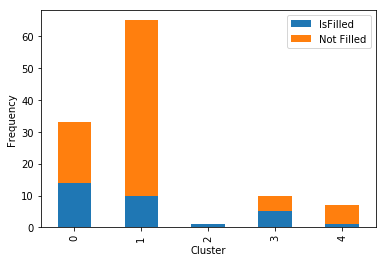

In [24]:
## Bar
dfSortCluster[['IsFilled', 'Not Filled']].plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

## Logit

In [25]:
## Choose features
dfX = dfRequisition[['Total Unique Candidates', 'Applicants', 'HasPhoneInterview',
                           'HasInPersonInterview', 'HasVideoInterview', 'IsProjectManager', 'IsDeveloper', 'IsEngineer', 'IsManagement']]
dfY = dfRequisition['IsFilled']

## Import scikit learn tools
from sklearn.model_selection import train_test_split

## Divide the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)
X_train.count(), X_test.count()

(Total Unique Candidates    69
 Applicants                 69
 HasPhoneInterview          69
 HasInPersonInterview       69
 HasVideoInterview          69
 IsProjectManager           69
 IsDeveloper                69
 IsEngineer                 69
 IsManagement               69
 dtype: int64, Total Unique Candidates    47
 Applicants                 47
 HasPhoneInterview          47
 HasInPersonInterview       47
 HasVideoInterview          47
 IsProjectManager           47
 IsDeveloper                47
 IsEngineer                 47
 IsManagement               47
 dtype: int64)

In [26]:
## Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dfVIF = add_constant(X_train)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

C:\Users\Weiran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,0
const,21.223202
Total Unique Candidates,2.002640
Applicants,1.665078
HasPhoneInterview,1.653893
HasInPersonInterview,1.433888
HasVideoInterview,1.185584
IsProjectManager,3.811338
IsDeveloper,5.835840
IsEngineer,4.961180
IsManagement,3.456879


In [27]:
## Import module
from sklearn.linear_model import LogisticRegression

## Create linear regression object
logreg = LogisticRegression()

## Fit data
logreg.fit(X_train, Y_train)

# Predictions
Y_predicted = logreg.predict(X_test)

## Residuals
residuals = Y_test - Y_predicted

# Accuracy of the model
logreg.score(X_test, Y_test)
#!

C:\Users\Weiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.723404255319149

In [28]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_predicted)
confusion_matrix

array([[31,  5],
       [ 8,  3]], dtype=int64)

In [29]:
## Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        36
           1       0.38      0.27      0.32        11

   micro avg       0.72      0.72      0.72        47
   macro avg       0.58      0.57      0.57        47
weighted avg       0.70      0.72      0.71        47



In [30]:
## Robustness
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=0) ## used 10 because data size is fairly large
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)

## Calculate mean accuracy
results.mean()

C:\Users\Weiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Weiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Weiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Weiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Weiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.6690476190476189